In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Load the dataset
file_path = '/content/combined_newchic_data.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
dataset.head(), dataset.columns

(  category         subcategory  current_price  raw_price  discount  \
 0    house       Outdoor Tools           0.22       0.18      0.29   
 1    house       Outdoor Tools           0.21       0.25      0.67   
 2    house  Dessert Decorators           0.36       0.36      0.48   
 3    house      Desktop Holder           0.07       0.08      0.67   
 4    house       Outdoor Tools           0.68       0.83      0.67   
 
    likes_count  is_new  
 0         0.14       0  
 1         0.33       0  
 2         0.31       0  
 3         0.42       0  
 4         0.12       0  ,
 Index(['category', 'subcategory', 'current_price', 'raw_price', 'discount',
        'likes_count', 'is_new'],
       dtype='object'))

In [ ]:
# Define features (X) and target (y)
X = dataset[['current_price', 'raw_price', 'discount', 'likes_count', 'is_new']]
y = dataset['category']

# Naive Bayes

In [ ]:
# Initialize StratifiedKFold and Naive Bayes model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = GaussianNB()

In [ ]:
# To store the accuracy of each fold
accuracies = []

In [ ]:
# Perform Stratified K-Fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [ ]:
# Average accuracy across all folds
average_accuracy = np.mean(accuracies)
average_accuracy

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 accessories       0.44      0.50      0.47      1414
        bags       0.25      0.28      0.27      1268
      beauty       0.21      0.21      0.21       760
       house       0.50      0.50      0.50      2609
     jewelry       0.35      0.33      0.34       970
        kids       0.40      0.39      0.40       929
       shoes       0.57      0.52      0.54      2232

    accuracy                           0.43     10182
   macro avg       0.39      0.39      0.39     10182
weighted avg       0.43      0.43      0.43     10182



In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.36693944 0.37250409 0.35482815 0.36661211 0.35363458 0.37000655
 0.37426326 0.3745907  0.36738703 0.36771447]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Average cross-validation score: 0.3668


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=42)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (30544, 5)
y_train shape: (30544,)
X_test shape: (10182, 5)
y_test shape: (10182,)


In [ ]:
# Train a decision tree model for classification
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the trained model with the testing data
y_pred = clf_default.predict(X_test)
# The prediction accuracy
accuracy = accuracy_score(y_pred, y_test)
print('The testing accuracy is: %.4f\n' % accuracy)

The testing accuracy is: 0.4272



In [ ]:
# Show the importance for each feature
print("Feature importances:\n{}".format(clf_default.feature_importances_))

Feature importances:
[0.1548231  0.26621873 0.18391344 0.38862214 0.00642259]


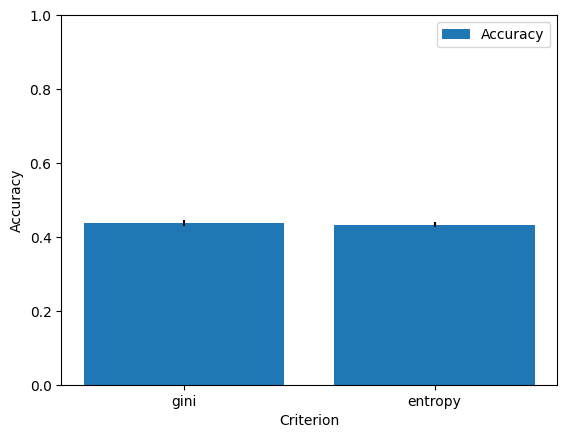

In [ ]:
# For each criterion, we use 10-fold cross validation to report the testing accuracy.
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV
cv_scores = []
cv_scores_std = []
splitting_criteria = ['gini', 'entropy']
for i in splitting_criteria:
 clf_dtc = DecisionTreeClassifier(criterion=i, random_state=42)
 scores = cross_val_score(clf_dtc, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True, random_state=42))
 cv_scores.append(scores.mean())
cv_scores_std.append(scores.std())
# Plot the relationship
plt.bar(splitting_criteria, cv_scores, yerr=cv_scores_std,
label='Accuracy')
plt.xlabel('Criterion')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

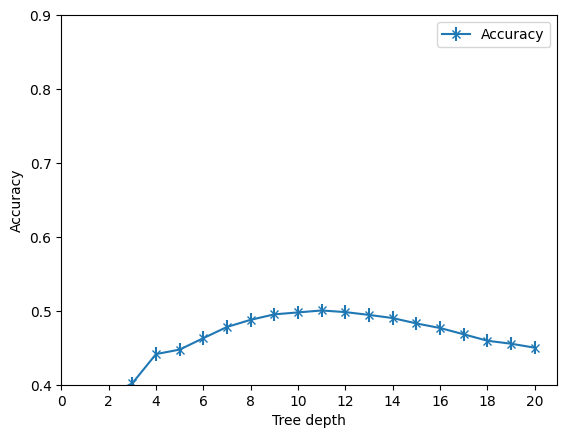

In [ ]:
# For each tree depth, we use 10-fold cross validation to report the testing accuracy.
cv_scores = []
cv_scores_std = []
depths = range(1, 21)
for i in depths:
 clf_dtc = DecisionTreeClassifier(max_depth=i, random_state=42)
 scores = cross_val_score(clf_dtc, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True, random_state=42))
 cv_scores.append(scores.mean())
cv_scores_std.append(scores.std())
# Plot the relationship
plt.errorbar(depths, cv_scores, yerr=cv_scores_std,
marker='x', label='Accuracy')
plt.xlabel('Tree depth')
plt.xticks(np.arange(0, 21, step=2))
plt.ylim(0.4, 0.9)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# New Section